# RFM 분석
- 데이터 출처 : 데이콘 - 이커머스 고객 세분화 분석
[https://dacon.io/competitions/official/236222/overview/description]

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px

In [9]:
## 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [10]:
## 파일 실행 경로 설정
%cd /content/drive/MyDrive/플젝/[데분 과제]/이커머스 고객 세분화 분석 - rfm/rfm
%ls

/content/drive/MyDrive/플젝/[데분 과제]/이커머스 고객 세분화 분석 - rfm/rfm
 Customer_info.csv   Marketing_info.csv    'RFM 분석.ipynb'
 Discount_info.csv   Onlinesales_info.csv   Tax_info.csv


In [11]:
### 파일 불러오기
customer = pd.read_csv('Customer_info.csv')
marketing = pd.read_csv('Marketing_info.csv')
discount = pd.read_csv('Discount_info.csv')
online = pd.read_csv('Onlinesales_info.csv')
tax = pd.read_csv('Tax_info.csv')


# 데이터 확인 및 전처리

## customer
: 고객과 관련된 정보

*   고객ID : 고객 고유 ID
*   성별 : 고객 성별
* 고객지역 : 고객지역
* 가입기간 : 가입기간 (단위 : 월)

In [12]:
customer.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [13]:
customer.info()
### 결측치 없음


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [14]:
##고객 아이디
customer['고객ID'].nunique()
### 다 다름

1468

In [15]:
## 성별 분포
customer['성별'].value_counts()
### 2:1

,count
성별,
여,934
남,534


In [16]:
##고객 가입 지역 분포
print(customer['고객지역'].unique())
customer['고객지역'].value_counts()
## 지역은 5개

['Chicago' 'California' 'New York' 'New Jersey' 'Washington DC']


,count
고객지역,
California,464
Chicago,456
New York,324
New Jersey,149
Washington DC,75


In [17]:
## 가입 기간 분포 그래프
fig = px.histogram(customer, x='가입기간')
fig.show()

### 상관 분석

In [18]:
### 성별과 가입 기간 상관 분석
fig = px.box(customer, x='성별', y='가입기간')
fig.show()
### 비슷함

In [19]:
### 지역과 가입 기간 상관분석
fig = px.box(customer, x='고객지역', y='가입기간')
fig.show()
### 얼추 비슷

In [20]:
### 성별과 지역 상관 분석
fig = px.box(customer, x='성별', y='고객지역')
fig.show()
### 비슷함

## marketing
:
마케팅비용과 관련된 정보
* 날짜 : 마케팅이 이루어진 날짜
* 오프라인비용 : 오프라인 마케팅으로 지출한 비용 (단위 : 달러)
* 온라인비용 : 온라인 마케팅으로 지출한 비용 (단위 : 달러)

In [21]:
marketing.head()

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [22]:
marketing.describe()
### 결측치 없음

,오프라인비용,온라인비용
count,365.000000,365.000000
mean,2843.561644,1905.880740
std,952.292448,808.856853
min,500.000000,320.250000
25%,2500.000000,1258.600000
50%,3000.000000,1881.940000
75%,3500.000000,2435.120000
max,5000.000000,4556.930000


In [23]:
marketing.info()
## 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [24]:
## 날짜 변환
marketing['날짜'] = pd.to_datetime(marketing['날짜'])
### 2019-01-01 ~ 2019-12-31

In [25]:
## 날짜별 온/오프라인 비용 비교
fig = px.line(marketing, x='날짜', y=['온라인비용', '오프라인비용'])
fig.show()
### 온라인 비용 많이 쓰면 오프라인 비용도 많이 씀

## Tax
: 세금과 관련된 정보
* 제품 카테고리 : 제품이 포함된 카테고리
* GST : Goods and Services Tax(%)

In [26]:
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [27]:
tax.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [28]:
tax['제품카테고리'].nunique()
## 중복 없음

20

In [29]:
## GST별 카테고리 그룹화
tax['GST']

,GST
0,0.10
1,0.10
2,0.18
3,0.18
4,0.18
5,0.18
6,0.05
7,0.05
8,0.18
9,0.18


## Discount
: 할인과 관련된 정보
* 월 : 월(Month) 정보
* 제품카테고리 : 제품이 포함된 카테고리
* 쿠폰코드 : 쿠폰코드
* 할인율 : 해당 쿠폰에 대한 할인율(%)

In [30]:
print(discount.shape)
discount.head()

(204, 4)


,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [31]:
discount.info()
## 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [32]:
## 월별 평균 할인율
fig = px.line(discount, x='월', y='할인율')
fig.show()

In [33]:
### 월별로 품목 상관없이 모든 제품의 할인률이 같나?
discount[discount['월'] == 'Dec']
### 같음

,월,제품카테고리,쿠폰코드,할인율
155,Dec,Apparel,SALE30,30
158,Dec,Nest-USA,ELEC30,30
161,Dec,Office,OFF30,30
164,Dec,Drinkware,EXTRA30,30
167,Dec,Lifestyle,EXTRA30,30
170,Dec,Bags,AIO30,30
173,Dec,Notebooks,NOTES30,30
176,Dec,Headgear,HGEAR30,30
179,Dec,Nest,NE30,30
182,Dec,Waze,WEMP30,30


In [34]:
## 월 형식 변경
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

discount['월'] = discount['월'].map(month_mapping)
discount.head()

,월,제품카테고리,쿠폰코드,할인율
0,1,Apparel,SALE10,10
1,2,Apparel,SALE20,20
2,3,Apparel,SALE30,30
3,1,Nest-USA,ELEC10,10
4,2,Nest-USA,ELEC20,20


## oneline
- 온라인거래와 관련된 정보
- 고객ID : 고객 고유 ID
- 거래ID : 거래 고유 ID
- 거래날짜 : 거래가 이루어진 날짜
- 제품ID : 제품 고유 ID
- 제품카테고리 : 제품이 포함된 카테고리
- 수량 : 주문한 품목 수
- 평균금액 : 수량 1개당 가격 (단위 : 달러)
  - 동일 상품이어도 세부 옵션에 따라 가격이 다를 수 있음
- 배송료 : 배송비용 (단위 : 달러)
- 쿠폰상태 : 할인쿠폰 적용 상태

In [35]:
online.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [36]:
online.info()
### 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [37]:
## 거래날짜 데이터 타입변환 -> datetime64
online['거래날짜'] = pd.to_datetime(online['거래날짜'])

#데이터 병합
- 모든 데이터 결측치 없음

In [38]:
## online + customer
### KEY = 고객ID
df = pd.merge(online, customer, on='고객ID', how='left')

In [39]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12


In [40]:
print(df.shape)
print(online.shape)
### 제대로 병합되었는지, 크기가 늘어나지 않았는지 확인

(52924, 12)
(52924, 9)


In [41]:
## discount(쿠폰 정보) + df
### KEY = 월, 제품카테고리
#### df는 월 없으므로 만둘어야함
df['월'] = df['거래날짜'].dt.month
df = pd.merge(df, discount, on=['월', '제품카테고리'], how='left')

In [42]:
print(df.shape)
print(online.shape)
df.head()

(52924, 15)
(52924, 9)


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,월,쿠폰코드,할인율
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,1,OFF10,10.0
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,1,SALE10,10.0
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,1,AIO10,10.0


In [43]:
## tax(세율) + df
### KEY = 제품카테고리
df = pd.merge(df, tax, on='제품카테고리', how='left')

In [44]:
print(df.shape)
print(online.shape)
df.head()

(52924, 16)
(52924, 9)


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,월,쿠폰코드,할인율,GST
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0,0.10
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0,0.10
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,1,OFF10,10.0,0.10
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,1,SALE10,10.0,0.18
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,1,AIO10,10.0,0.18


## 결측치 확인

In [45]:
df.info()
### 쿠폰코드랑 할인율 결측치 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   고객ID    52924 non-null  object        
 1   거래ID    52924 non-null  object        
 2   거래날짜    52924 non-null  datetime64[ns]
 3   제품ID    52924 non-null  object        
 4   제품카테고리  52924 non-null  object        
 5   수량      52924 non-null  int64         
 6   평균금액    52924 non-null  float64       
 7   배송료     52924 non-null  float64       
 8   쿠폰상태    52924 non-null  object        
 9   성별      52924 non-null  object        
 10  고객지역    52924 non-null  object        
 11  가입기간    52924 non-null  int64         
 12  월       52924 non-null  int32         
 13  쿠폰코드    52524 non-null  object        
 14  할인율     52524 non-null  float64       
 15  GST     52924 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2), object(8)
memory usage: 6.3+ MB


In [46]:
#### 쿠폰 코드랑 할인율 0인 항목 있음 -> 세일 안한 항목으로 간주하고 0으로 채우겠음
df['쿠폰코드'].fillna('None', inplace=True)
df['할인율'].fillna(0, inplace=True)

In [47]:
df[df['할인율'] == 0].head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,월,쿠폰코드,할인율,GST
62,USER_1358,Transaction_0020,2019-01-01,Product_1138,Fun,4,9.27,6.50,Used,남,Chicago,12,1,None,0.0,0.18
95,USER_0585,Transaction_0046,2019-01-02,Product_0863,Backpacks,1,103.15,6.50,Clicked,여,New York,46,1,None,0.0,0.10
157,USER_1421,Transaction_0078,2019-01-02,Product_0950,Fun,1,7.42,6.50,Used,여,California,10,1,None,0.0,0.18
178,USER_0906,Transaction_0095,2019-01-02,Product_0196,Fun,2,7.42,6.50,Not Used,여,Washington DC,40,1,None,0.0,0.18
193,USER_0954,Transaction_0105,2019-01-02,Product_0886,Google,1,11.54,17.96,Clicked,여,California,30,1,None,0.0,0.10


# 피쳐 생성

### 쿠폰 사용 여부

In [48]:
### 쿠폰 사용 여부 -> 사용에 따른 금액 / 사람들이 쿠폰에 관심 있는가 확인
df['쿠폰상태'].unique()
df['쿠폰사용여부'] = df['쿠폰상태'].apply(lambda x: 1 if x == 'Used' else 0)
### 쿠폰 사용이면 1 아니면 0

In [49]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,월,쿠폰코드,할인율,GST,쿠폰사용여부
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0,0.10,1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0,0.10,1
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,1,OFF10,10.0,0.10,1
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,1,SALE10,10.0,0.18,0
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,1,AIO10,10.0,0.18,1


### 금액
- 주문 당 금액
- 주문 금액에 세금 포함
- 총 지불한 금액(쿠폰 사용에 따른 할인 등 반영)

In [50]:
# 전체금액 = (수량 * 평균금액)
# 전체금액_VAT포함 = (수량 * 평균금액) * (1 + tax)
# 지불금액 = (수량 * 평균금액) * (1 - 할인율*쿠폰사용여부 / 100) * (1 + tax)

df['주문금액'] = (df['수량'] * df['평균금액'])
df['주문금액_VAT포함'] = (df['수량'] * df['평균금액']) * (1 + df['GST'])
df['지불금액'] = (df['수량'] * df['평균금액']) * (1 + df['GST']) * (1 - (df['할인율'] * df['쿠폰사용여부'] / 100))

In [51]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,월,쿠폰코드,할인율,GST,쿠폰사용여부,주문금액,주문금액_VAT포함,지불금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0,0.10,1,153.71,169.081,152.1729
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0,0.10,1,153.71,169.081,152.1729
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,1,OFF10,10.0,0.10,1,2.05,2.255,2.0295
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,1,SALE10,10.0,0.18,0,87.65,103.427,103.4270
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,1,AIO10,10.0,0.18,1,16.50,19.470,17.5230


# RFM
- 사용자별로 얼마나 최근에, 얼마나 자주, 얼마나 많은 금액을 지출했는지 사용자 분포 및 그룹화

1. Recency : 얼마나 최근에 구매했는가
2. Frequency : 얼마나 자주 구매했는가
3. Monetary : 얼마나 많은 금액을 지출했는가

## RFM 데이터 생성

### 고객별 RFM 계산
- Recency
- Frquenecy
- Monetary

In [52]:
# 데이터의 마지막날 +1일을 기준으로 잡음
last = df['거래날짜'].max() + pd.DateOffset(days=1)  # 2019-12-31 + 1일 = 2020-01-01
### DataOffset()

rfm_df = df.groupby(['고객ID']).agg({
    '거래날짜': lambda x: (last - x.max()).days,
    '거래ID': lambda x: x.nunique(),
    '지불금액': 'sum'
    })

rfm_df.rename(columns={'거래날짜': 'Recency',
                         '거래ID': 'Frequency',
                         '지불금액': 'Monetary'}, inplace=True)

rfm_df.head()

,Recency,Frequency,Monetary
고객ID,,,
USER_0000,108,1,24.98174
USER_0001,60,31,15021.70396
USER_0002,74,8,1492.40594
USER_0003,18,11,1339.55528
USER_0004,108,13,1369.93900


### 시각화

In [53]:
# Recency, Frequency, Monetary 고객 분포 시각화
px.histogram(rfm_df, x=['Recency'])

In [54]:
px.histogram(rfm_df, x=['Frequency'])

In [55]:
px.histogram(rfm_df, x=['Monetary'])

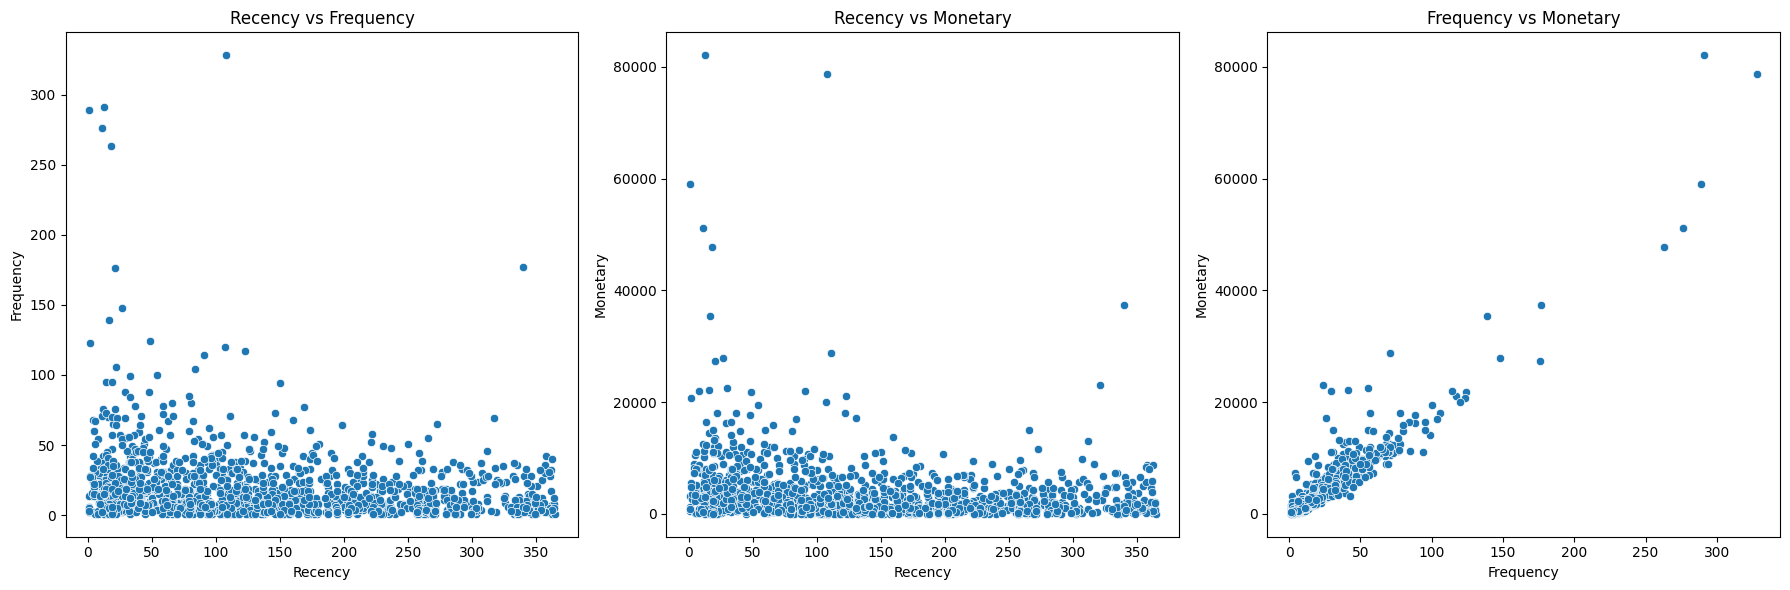

In [56]:
## 산점도
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency')
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary')
plt.title('Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary')
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

plt.tight_layout()
plt.show()

## 등급화

### R

In [57]:
### Recency를 6단계로 구분 : 비즈니스 로직에서 가장 많이 하는 1,2,3,6개월, 1년으로 등급화
def R(recency):
    if recency <= 30:    # 최근 1개월
        return 5
    elif recency <= 60:   # 최근 2개월
        return 4
    elif recency <= 90:   # 최근 3개월
        return 3
    elif recency <= 180:  # 최근 6개월
        return 2
    elif recency <= 365:  # 최근 1년
        return 1
    else:
        return 0

rfm_df['R'] = rfm_df['Recency'].apply(R)

In [58]:
rfm_df.head()

,Recency,Frequency,Monetary,R
고객ID,,,,
USER_0000,108,1,24.98174,2
USER_0001,60,31,15021.70396,4
USER_0002,74,8,1492.40594,3
USER_0003,18,11,1339.55528,5
USER_0004,108,13,1369.93900,2


In [59]:
### r등급화 갯수
rfm_df.groupby('R').count()

,Recency,Frequency,Monetary
R,,,
1,503,503,503
2,422,422,422
3,151,151,151
4,161,161,161
5,231,231,231


In [60]:
## r등급화 평균
rfm_df.groupby('R').mean()

,Recency,Frequency,Monetary
R,,,
1,265.441352,12.326044,2162.597339
2,135.518957,16.215640,2756.739568
3,75.821192,19.456954,3480.394838
4,44.136646,26.254658,5101.303014
5,17.437229,27.805195,5379.842905


### F

In [61]:
## Frequency 분포 시각화
px.box(rfm_df, y='Frequency')

In [62]:
rfm_df[rfm_df['Frequency'] >= 50].shape

(90, 4)

In [63]:
rfm_df['Frequency'].min(), rfm_df['Frequency'].max(), rfm_df['Frequency'].mean(), rfm_df['Frequency'].median()

(1, 328, np.float64(18.141008174386922), 11.0)

In [64]:
rfm_df['F'] = rfm_df['Frequency'].apply(lambda x: 50 if x >= 50 else x)

In [65]:
def create_bins(series, method='quantile', bins=10, labels=None):
    """
    연속형 컬럼 binning 함수

    Parameters:
        series : pd.Series (연속형 데이터)
        method : 'quantile' (분위수) or 'uniform' (균등)
        bins : 구간 수
        labels : 구간 이름 리스트 (default None -> 자동 생성)

    Returns:
        pd.Series : binning된 구간
    """
    if method == 'quantile':
        binned = pd.qcut(series, q=bins, labels=labels, duplicates='drop')
    elif method == 'uniform':
        binned = pd.cut(series, bins=bins, labels=labels)
    else:
        raise ValueError("method는 'quantile' 또는 'uniform'만 가능합니다.")

    return binned


create_bins(rfm_df['F'], method='quantile', bins=5).value_counts().sort_index()

,count
F,
"(0.999, 4.0]",329
"(4.0, 8.0]",291
"(8.0, 15.0]",288
"(15.0, 28.0]",281
"(28.0, 50.0]",279


In [66]:
create_bins(rfm_df['F'], method='uniform', bins=5).value_counts().sort_index()

,count
F,
"(0.951, 10.8]",722
"(10.8, 20.6]",320
"(20.6, 30.4]",175
"(30.4, 40.2]",113
"(40.2, 50.0]",138


In [67]:
rfm_df['F'] = create_bins(rfm_df['F'], method='quantile', bins=5, labels=[1, 2, 3, 4, 5])
rfm_df.head()

,Recency,Frequency,Monetary,R,F
고객ID,,,,,
USER_0000,108,1,24.98174,2,1
USER_0001,60,31,15021.70396,4,5
USER_0002,74,8,1492.40594,3,2
USER_0003,18,11,1339.55528,5,3
USER_0004,108,13,1369.93900,2,3


### M

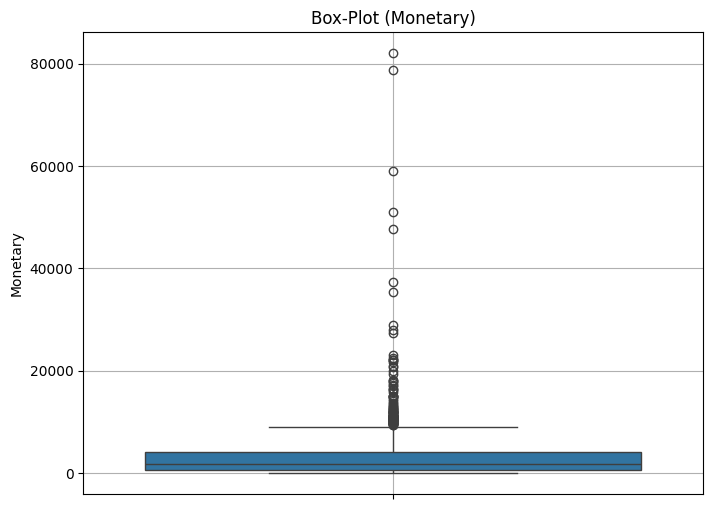

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=rfm_df['Monetary'])
plt.title('Box-Plot (Monetary)')
plt.grid(True)
plt.show()

In [69]:
create_bins(rfm_df['Monetary'], method='quantile', bins=5).value_counts().sort_index()

,count
Monetary,
"(0.989, 516.994]",294
"(516.994, 1265.552]",293
"(1265.552, 2475.859]",294
"(2475.859, 4837.059]",293
"(4837.059, 82073.783]",294


In [70]:
rfm_df['M'] = create_bins(rfm_df['Monetary'], method='quantile', bins=5, labels=[1, 2, 3, 4, 5])
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
고객ID,,,,,,
USER_0000,108,1,24.98174,2,1,1
USER_0001,60,31,15021.70396,4,5,5
USER_0002,74,8,1492.40594,3,2,3
USER_0003,18,11,1339.55528,5,3,3
USER_0004,108,13,1369.93900,2,3,3


In [71]:
rfm_df['F'] = rfm_df['F'].astype('int')
rfm_df['M'] = rfm_df['M'].astype('int')

## RFM 스코어 생성

In [74]:
rfm_df['RFM_Score'] = rfm_df['R'] + rfm_df['F'] + rfm_df['M']
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
고객ID,,,,,,,
USER_0000,108,1,24.98174,2,1,1,4
USER_0001,60,31,15021.70396,4,5,5,14
USER_0002,74,8,1492.40594,3,2,3,8
USER_0003,18,11,1339.55528,5,3,3,11
USER_0004,108,13,1369.93900,2,3,3,8


In [75]:
rfm_df.groupby(['RFM_Score'])[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
RFM_Score,,,
3,269.310345,1.827586,165.519675
4,184.535714,2.871429,335.432470
5,211.393443,5.180328,740.580799
6,170.363636,6.322314,1020.582095
7,167.277027,8.709459,1357.415635
8,137.171171,10.585586,1842.460981
9,150.474453,15.284672,2490.126146
10,122.913043,18.269565,3293.723988
11,135.296875,27.085938,4980.184274


## RFM 기반 고객 분류

In [76]:
def classify_customer(row):
    r, f, m = row['R'], row['F'], row['M']

     # VIP
    if r >= 5 and f >= 5 and m >= 5:
        return 'VIP'
    # VIP이탈고객: Recency 점수가 3 이하이며, 나머지 점수가 4 이상
    elif r <= 3 and (f >= 4 and m >= 4):
        return 'VIP이탈고객'
    elif f >= 4 and r >= 4 and m >= 4:
        return '충성고객'
    elif f >= 3 and r >= 3 and m >= 3:
        return '충성예정고객'
    elif r <= 2 and f >= 3:
        return '충성이탈예정고객'
    else:
        return '일반고객'  # 이외의 경우를 위한 기본값

rfm_df['고객등급'] = rfm_df.apply(classify_customer, axis=1)



rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,고객등급
고객ID,,,,,,,,
USER_0000,108,1,24.98174,2,1,1,4,일반고객
USER_0001,60,31,15021.70396,4,5,5,14,충성고객
USER_0002,74,8,1492.40594,3,2,3,8,일반고객
USER_0003,18,11,1339.55528,5,3,3,11,충성예정고객
USER_0004,108,13,1369.93900,2,3,3,8,충성이탈예정고객


In [79]:
customer_grade_counts_desc = rfm_df['고객등급'].value_counts().sort_values(ascending=False)


px.bar(x=customer_grade_counts_desc.index, y=customer_grade_counts_desc.values)